In [1]:
import pandas as pd
import requests
from lxml import etree
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('all_small_relationship.csv')

In [35]:
df['LABEL'] = np.nan
df['POPULATION'] = np.nan
df

,name,FATHER,MOTHER,CHILD,LABEL,POPULATION
0,HG02461,NaN,NaN,NaN,NaN,NaN
1,HG02462,NaN,NaN,NaN,NaN,NaN
2,HG02464,NaN,NaN,NaN,NaN,NaN
3,HG02465,NaN,NaN,NaN,NaN,NaN
4,HG02561,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
500,SC_GMWOF5428875,NaN,NaN,SC_GMWOF5428859,NaN,NaN
501,SC_GMWOF5428877,NaN,NaN,SC_GMWOF5428861,NaN,NaN
502,SC_GMWOF5428879,NaN,NaN,SC_GMWOF5428863,NaN,NaN
503,SC_GMWOF5428882,NaN,NaN,SC_GMWOF5428865,NaN,NaN


In [34]:
labels = ['HG','GMMAN','GMWOF','GMJOL','GMFUL']
populations = ['Mandinka','Mandinka','Wolof','Jola','Fula']

In [37]:
for i in range(5):
    df.loc[(df['name'].str.contains(labels[i], regex = True)), 'LABEL'] = labels[i]
    df.loc[(df['name'].str.contains(labels[i], regex = True)), 'POPULATION'] = populations[i]

In [30]:
la = df.groupby(['LABEL']).size()
la.name = "labels"


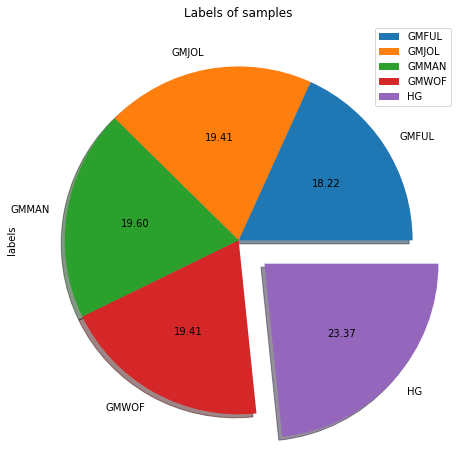

In [86]:
plt.title('Labels of samples')
la.plot(kind = 'pie', autopct='%.2f', figsize = (8,8),explode = (0,0,0,0,0.2),shadow = True)
plt.legend(loc = 'upper right')
plt.show
plt.savefig('./pics/labels_pie.jpg')

In [51]:
df.to_csv('all_small_relationship.csv', index=False)

In [2]:
pd.read_csv('all_small_relationship.csv')

,name,FATHER,MOTHER,CHILD,LABEL,POPULATION
0,HG02461,NaN,NaN,NaN,HG,Mandinka
1,HG02462,NaN,NaN,NaN,HG,Mandinka
2,HG02464,NaN,NaN,NaN,HG,Mandinka
3,HG02465,NaN,NaN,NaN,HG,Mandinka
4,HG02561,NaN,NaN,NaN,HG,Mandinka
...,...,...,...,...,...,...
500,SC_GMWOF5428875,NaN,NaN,SC_GMWOF5428859,GMWOF,Wolof
501,SC_GMWOF5428877,NaN,NaN,SC_GMWOF5428861,GMWOF,Wolof
502,SC_GMWOF5428879,NaN,NaN,SC_GMWOF5428863,GMWOF,Wolof
503,SC_GMWOF5428882,NaN,NaN,SC_GMWOF5428865,GMWOF,Wolof


In [12]:
pd.notnull(df['FATHER']).sum()

126

In [13]:
pd.notnull(df['MOTHER']).sum()

123

In [14]:
pd.notnull(df['CHILD']).sum()

249

In [26]:
nadf = df[df[['CHILD','MOTHER','FATHER']].T.isnull().all()==True]

In [29]:
nala = nadf.groupby(['LABEL']).size()

In [49]:
nala.name = 'single_num'

In [50]:
barla = pd.concat([la-nala, nala], axis=1)
barla.columns = ['triple_group_num', 'single_num']

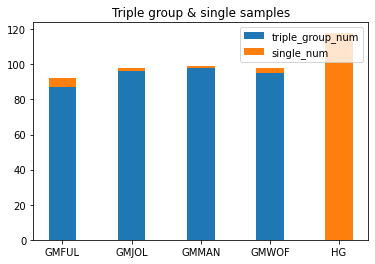

In [54]:
plt.title('Triple group & single samples')
plt.bar(barla.index, barla['triple_group_num'],width =0.4, label = 'triple_group_num')
plt.bar(barla.index, barla['single_num'],width =0.4, bottom = barla['triple_group_num'],label = 'single_num')
plt.legend(loc = 'upper right')
plt.show
plt.savefig('./pics/labels_bar.jpg')

In [3]:
df = pd.read_csv('./data2013/relationship.csv')

In [7]:
df

,Family ID,Individual ID,Paternal ID,Maternal ID,Gender,Phenotype,Population,Relationship,Siblings,Second Order,Third Order,Other Comments
0,BB01,HG01879,0,0,1,0,ACB,father,0,0,0,0
1,BB01,HG01880,0,0,2,0,ACB,mother,0,0,0,0
2,BB01,HG01881,HG01879,HG01880,2,0,ACB,child,0,0,0,0
3,BB02,HG01882,0,0,1,0,ACB,father,0,0,0,0
4,BB02,HG01883,0,0,2,0,ACB,mother,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3496,Y117,NA19239,0,0,1,0,YRI,father,0,0,0,0
3497,Y117,NA19240,NA19239,NA19238,2,0,YRI,child,0,0,0,0
3498,Y120,NA19247,0,0,2,0,YRI,mother,0,0,0,0
3499,Y120,NA19248,0,0,1,0,YRI,father,0,0,0,0


In [9]:
data = pd.read_csv('./all_small_data_name.csv')

In [12]:
data.columns = ['Individual ID']
data

,Individual ID
0,HG02461
1,HG02462
2,HG02464
3,HG02465
4,HG02561
...,...
500,SC_GMWOF5428875
501,SC_GMWOF5428877
502,SC_GMWOF5428879
503,SC_GMWOF5428882


In [16]:
result = pd.merge(df,data)
#result.to_csv("./data/family_relationship.csv", index=False)
result

,Family ID,Individual ID,Paternal ID,Maternal ID,Gender,Phenotype,Population,Relationship,Siblings,Second Order,Third Order,Other Comments
0,GB105,HG03024,0,0,1,0,GWD,father,0,0,0,0
1,GB105,HG03025,0,0,2,0,GWD,mother,0,0,0,0
2,GB106,HG03028,0,0,2,0,GWD,mother,0,0,0,0
3,GB108,HG03033,0,0,1,0,GWD,father,0,0,0,0
4,GB108,HG03034,0,0,2,0,GWD,mother,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
113,GB91,HG02891,0,0,2,0,GWD,mother,0,0,0,0
114,GB93,HG02895,0,0,1,0,GWD,father,0,0,0,0
115,GB93,HG02896,0,0,2,0,GWD,mother,0,0,0,0
116,GB97,HG02982,0,0,1,0,GWD,father,0,0,0,0


In [28]:
df[(df['Third Order'] != '0') & (df['Other Comments'] == '0')]

,Family ID,Individual ID,Paternal ID,Maternal ID,Gender,Phenotype,Population,Relationship,Siblings,Second Order,Third Order,Other Comments
1220,NG64,HG03268,0,0,1,0,ESN,father,0,0,HG03271,0
1223,NG65,HG03271,0,0,1,0,ESN,father,0,0,HG03268,0
1236,NG75,HG03301,0,0,1,0,ESN,father,0,0,HG03372,0
1253,NG89,HG03343,0,0,1,0,ESN,father,0,0,HG03352,0
1257,NG92,HG03352,0,0,1,0,ESN,father,0,0,"HG03366,HG03343",0
1263,NG97,HG03366,0,0,2,0,ESN,mother,0,0,HG03352,0
1269,NG99,HG03372,0,0,2,0,ESN,mother,0,0,HG03301,0
1572,NA21114,NA21114,0,0,1,0,GIH,unrel,0,0,NA21134,0
1590,NA21134,NA21134,0,0,1,0,GIH,unrel,0,0,NA21114,0
1660,GB28,HG02610,0,0,1,0,GWD,father,0,0,HG02624,0


In [29]:
df.size

42012